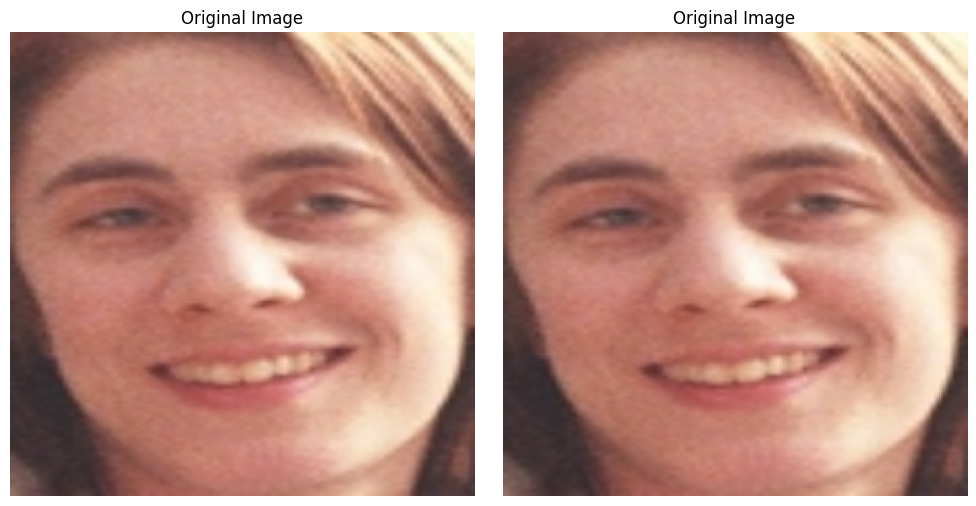

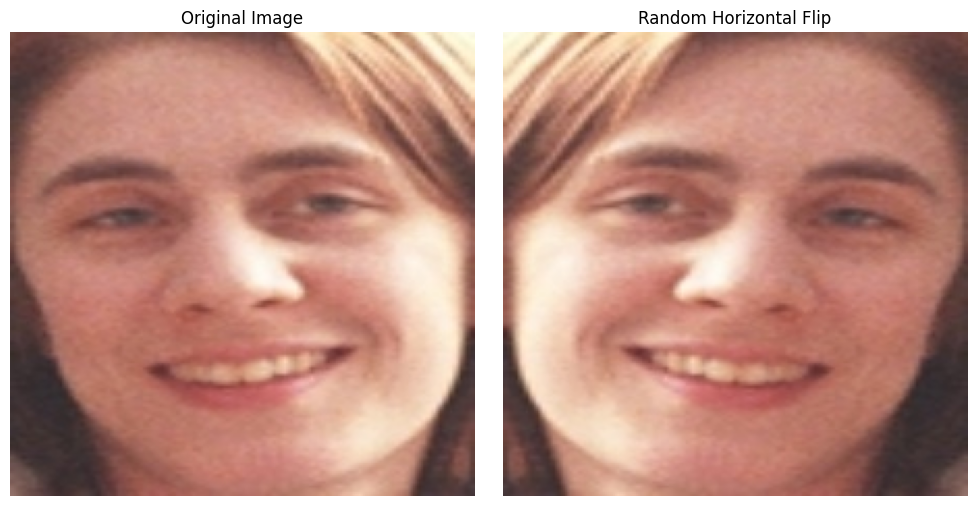

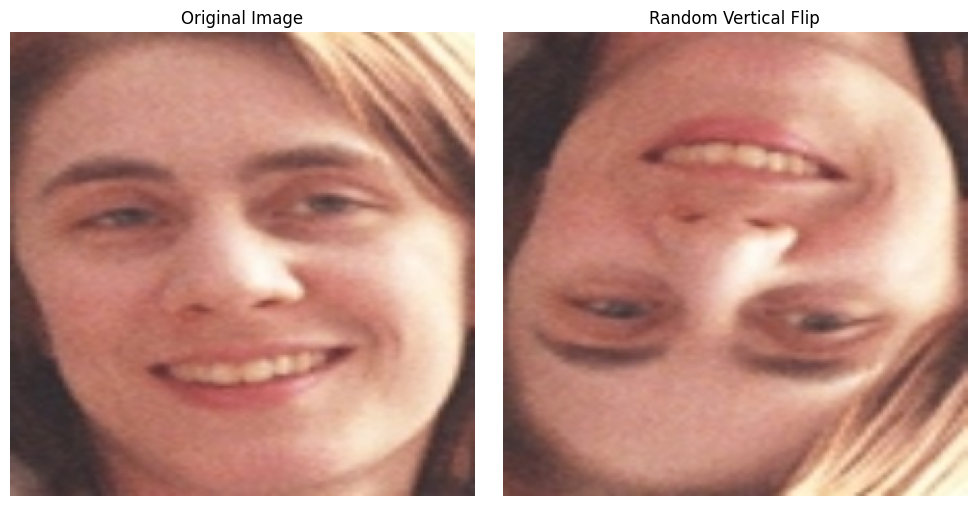

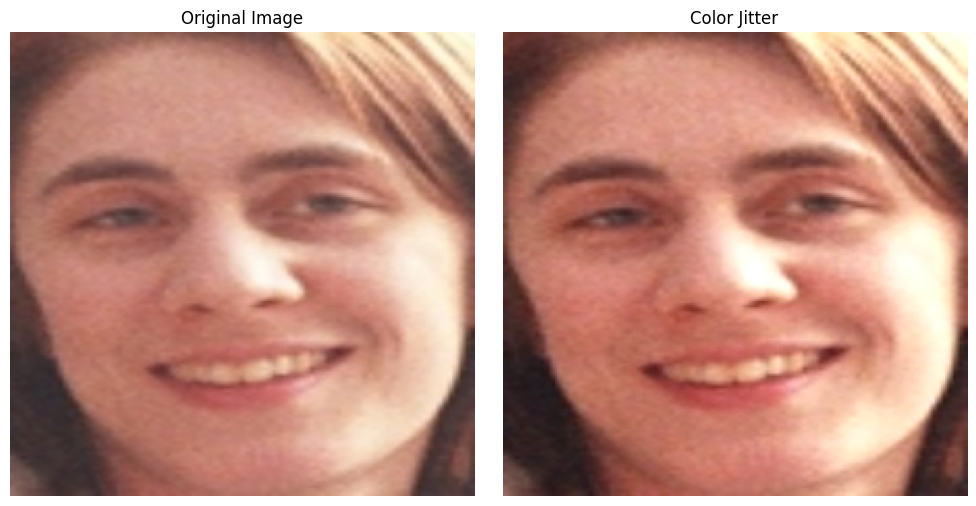

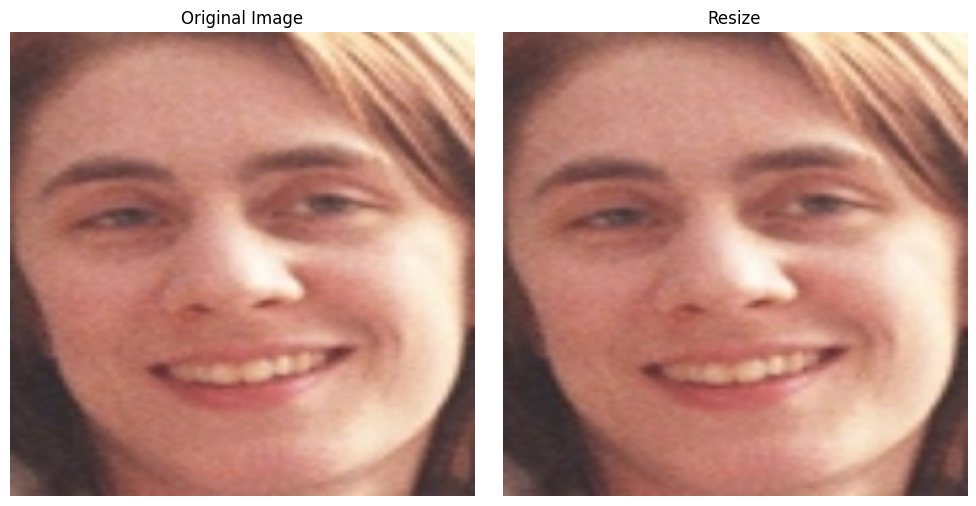

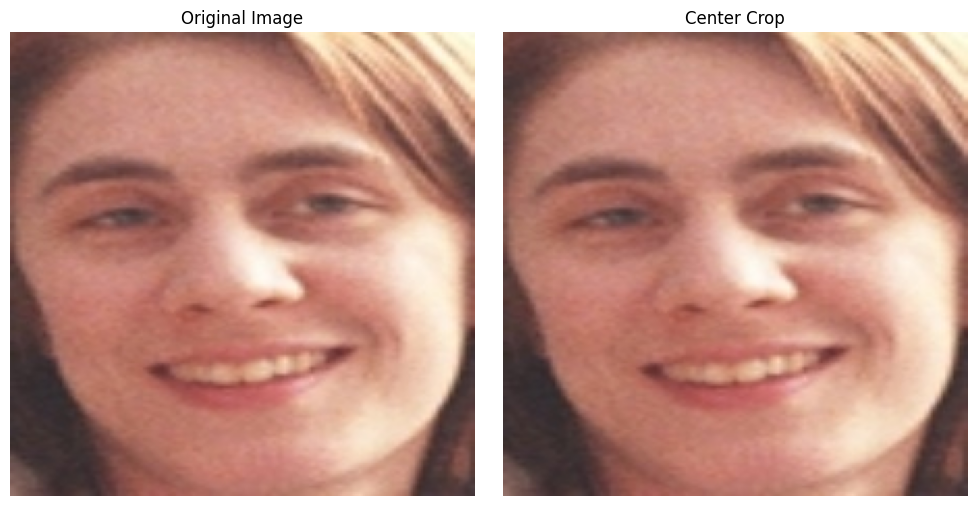

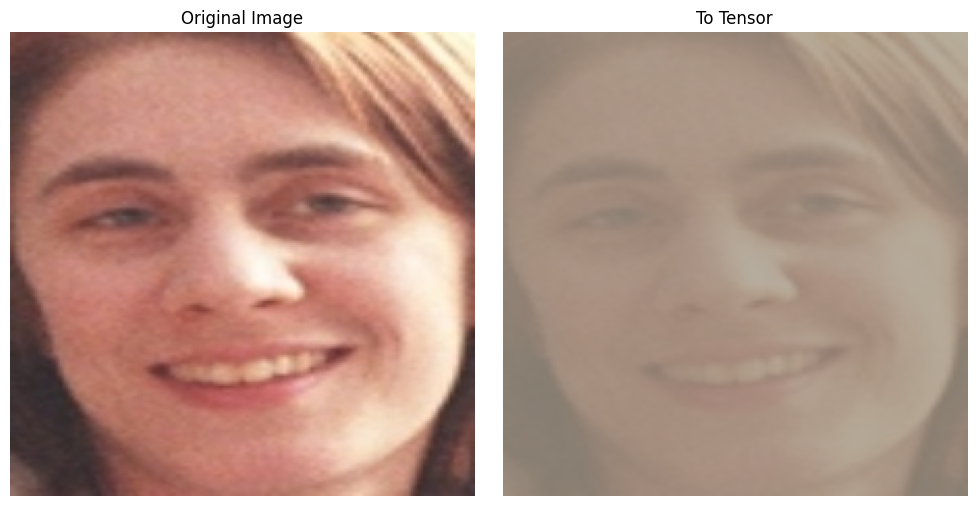

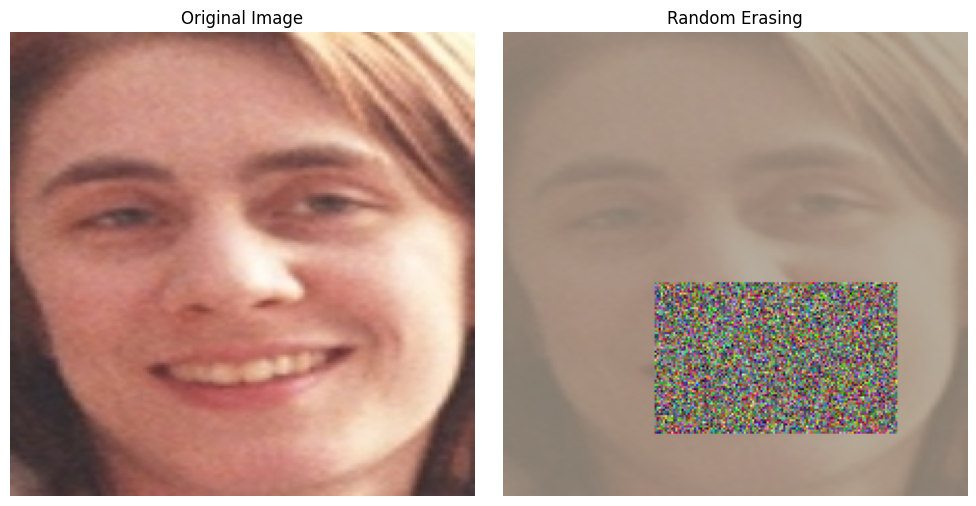

In [49]:
import matplotlib.pyplot as plt
import torchvision.transforms as T
from PIL import Image
import torch

# Load an example image
example_image_path = '/kaggle/input/openforensics-explainability/images/real4.jpg'
original_image = Image.open(example_image_path)

# Step-by-step transformations
steps = {
    "Original Image": original_image,
    "Random Horizontal Flip": T.RandomHorizontalFlip(p=1)(original_image),
    "Random Vertical Flip": T.RandomVerticalFlip(p=1)(original_image),
    "Color Jitter": T.RandomApply(torch.nn.ModuleList([T.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5)]), p=1)(original_image),
    "Resize": T.Resize(224)(original_image),
    "Center Crop": T.CenterCrop(224)(original_image),
    "To Tensor": T.ToTensor()(T.CenterCrop(224)(original_image)),  # Convert to Tensor
    "Random Erasing": T.RandomErasing(p=1, value='random')(T.ToTensor()(T.CenterCrop(224)(original_image))),  # Apply Random Erasing
}

# Visualization
for title, step_image in steps.items():
    plt.figure(figsize=(10, 5))
    if isinstance(step_image, torch.Tensor):  # Handle Tensor Images
        if step_image.ndimension() == 3:  # Denormalize and convert to HWC format
            step_image = step_image.permute(1, 2, 0)  # CHW -> HWC
            step_image = step_image * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])  # Denormalize
            step_image = step_image.clamp(0, 1).numpy()

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')
    
    # Processed Image
    plt.subplot(1, 2, 2)
    plt.imshow(step_image)
    plt.imshow(step_image if isinstance(step_image, Image.Image) else step_image)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'{title}.png', format='png', dpi=300)
    plt.show()

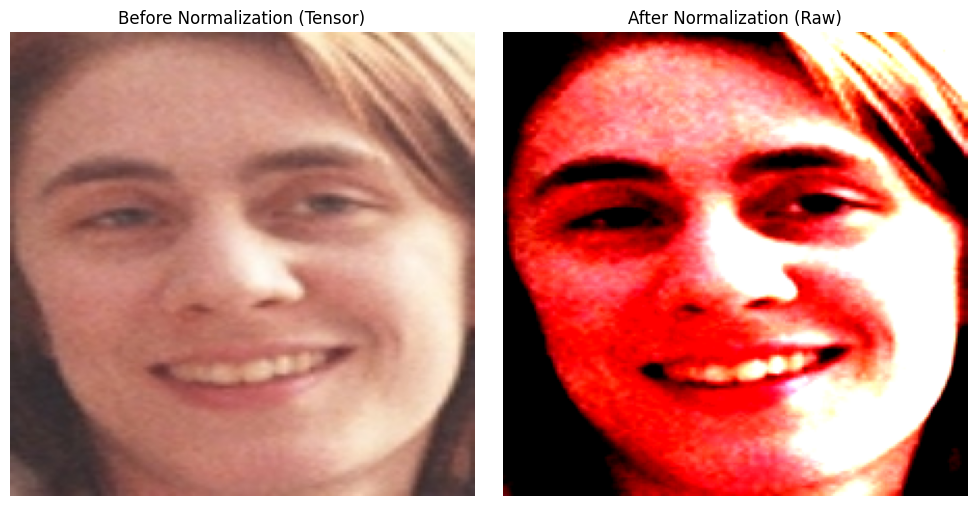

In [30]:
# Define transformations for visualization
to_tensor = T.ToTensor()
normalize = T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

# Apply transformations
tensor_image = to_tensor(original_image)
normalized_image = normalize(tensor_image)

# Visualization
plt.figure(figsize=(10, 5))

# Original (tensor form, unnormalized)
plt.subplot(1, 2, 1)
plt.imshow(tensor_image.permute(1, 2, 0).numpy())  # CHW -> HWC
plt.title("Before Normalization (Tensor)")
plt.axis("off")

# Normalized (raw, no denormalization for display)
plt.subplot(1, 2, 2)
plt.imshow(normalized_image.permute(1, 2, 0).numpy())  # CHW -> HWC
plt.title("After Normalization (Raw)")
plt.axis("off")

plt.tight_layout()
plt.savefig(f'Normalization.png', format='png', dpi=300)
plt.show()